# Investigating Mechanical Stratigraphy Control on Displacment Profiles of Thrust Faults

## Displacement Distance and Analysis

## *A Case Study on coalmines dataset from Ruhr Coalfield in the Lower Rhine basin, Germany.*  

***By: Ramy Abdallah***

![Chevron folds](https://i.imgur.com/OXCpTXZ.png)

## Introduction

The patterns of the displacement-distance profiles were originally derived from displacement variations vertically along the thrust trace, and the distance from the reference point to the tips of the thrust, wherein any large thrust displacement reduces towards the two ends of the thrust trace.

More specifically, the recognition that the displacement-distance profiles were at a maximum near the centre and diminished outwards in all directions to the edge of the thrust where the displacement is zero led to the understanding that the displacement-distance profile permanently had a simple shape of normal distribution in the idealised model. 

More recent observations, primarily from regional and outcrop field studies and seismic reflection data, have supported an alternative, more complex displacement profile pattern. 

In this, the displacement profiles show variations from the normal distribution by increasing or decreasing the displacement in which the displacement-distance profiles are possibly controlled by mechanical stratigraphy.

However, another explanation could be inaccurate interpretations in which the relation between faults and horizons is misinterpreted, resulting in abnormal fold-thrust geometries and displacement distribution.

 A third, more kinematic explanation posits that the displacement is transferred either by fault to fault interaction (hard linkage) or fault to fold interaction (soft linkage) which also resulting in a complex displacement profile pattern.

![Thrust Faults Structures](https://i.imgur.com/BwLPcB5.png)

## Objective

This study explores and visualises offsets data (displacement, throw and heaves) of thrust faults and their subsets such as dip angle, azimuth and gradients to investigate subsurface mechanical stratigraphy or lithologies, which describe what combination of rock layers controls a given displacement – distance profile.

## Aims

This study aims to analyse, visualise, and explore the data to get intuitive insights into the dataset, which leads to better understanding, reducing the associated risk and eventually better understanding of the thrust growth and displacement distribution. These aims can be achieved by answering the following questions:

>1. How we generally explore the dataset?

>2. How we analyse the dataset?

>3. What is the maximum & minmum displacement and gradients in the dataset?

>4. What is the total displacement of thrust faults and the total fault lenght in the Rhur subbasin?

>5. What is the average displacement and distance of thrust faults in the study area?

>6. Do we have any outliers on the displacement dataset in the Ruhr subbasin?

>7. Are there any correlations between numerical variables?

>8. How does a categorical variable relate to a numerical variable?

>9. How does the data distribution change across different categories?

>10. How does the data vary across different segments or groups?


## Runing the code

You can execute the code using the "Run" button at the top of this page. You can make changes and save your own version of the notebook. You can also run the notebook on Binder, or Colab (Google's cloud infrastructure), or Run-on Kaggle.

## Data

This dataset used in this study includes 98 faults and its displacement–distance profiles, where Python provides an excellent toolset for visualising the data from different views quickly and easily. The data used in the notebook is CSV file. We used log plots, histograms and cross plots (scatter plots) to analyse and explore the displacement data.

## Libraries

In this study we are going to use mainly `pandas` libarary.

`pandas` is a Python library that provides quick, versatile, and expressive data structures that enable dealing with "relational" or "labelled" data simple and intuitive. It intends to be the core high-level building block for performing realistic, real-world data analysis in Python. Furthermore, it aspires to be the most effective and adaptable open source data analysis/manipulation tool accessible in any language. for more information see https://pandas.pydata.org/docs/getting_started/overview.html. Also, we add few additional libraries to invistigate the data.

First, let's install the Pandas library.
To install the library inside the notbook use `pip` by uncomment the following cell and then `import` to import it as pd for short.

In [1]:
# !pip install pandas --upgrade --quiet

In [2]:
import math
import warnings
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import matplotlib as mpl
import plotly.express as px
from matplotlib import style
from scipy import interpolate
from mpl_toolkits import mplot3d
from copy import deepcopy as copy
from matplotlib import pyplot as plt
from scipy.stats import semicircular 
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

sns.set()
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

## Configuring styles

In [3]:
%matplotlib inline
sns.set_style("darkgrid")
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Project Workflow Overview

>1. **Load, display and visualised the dataset**
>2. **Perform data preparation & cleaning**
>3. **Perform exploratory analysis & visualization**
>4. **Ask & answer questions about the data**
>5. **Summarize inferences & write a conclusion**

We have two main data files—one for the displacement measurements and the second for the lithology information. We read, explore, clean and visualise the displacement–distance data and the lithology data file.

### Data preparation

This step is concerned with transforming the raw data available in CSV files to `pandas` dataframe. To read the file, we can use the `read_csv` method from Pandas. 

### Download the Displacement - Distance Data

Here we load and visualise the dispalcement data file.

In [4]:
fault_df = pd.read_csv(r'C:\Users\r04ra18\Desktop\fault-dataset\final-notebooks\data\disp-dist-data.csv')

In [5]:
type(fault_df)

pandas.core.frame.DataFrame

In [6]:
fault_df.head()

,FaultName,Name,Distance,Displacement,HorizonName,Uncertainty,ProfilePatterns,Section,Gradients,Fault_Size
0,Sc_8_F_8,f1,0.0,0.0,F-2,Proven,Positive Skewed,Upper,2.913158,Medium
1,Sc_8_F_8,f1,114.0,332.1,Zo2,Secured,Positive Skewed,Upper,0.878015,Medium
2,Sc_8_F_8,f1,259.1,459.5,Zo8,Secured,Positive Skewed,Mid,-0.504277,Medium
3,Sc_8_F_8,f1,925.4,123.5,Gu,Secured,Positive Skewed,Mid,0.015397,Medium
4,Sc_8_F_8,f1,1048.8,125.4,Ma,Secured,Positive Skewed,Lower,-0.611216,Medium


Before we start studying the displacement data, let us consider the uncertainty in the dataset by mapping the uncertainty classes as “Proven”, “Secured”, and “Assumed” to specific numerical values. Let us create a dictionary, store the uncertainty classes, and give each class numerical values such as 2 for Proven, 4 for Secured, and 8 for Assumed.

In [7]:
uncertainty_map={'Proven': 2,'Secured': 4,'Assumed': 8}

In [8]:
fault_df['Uncertainty_num'] = fault_df['Uncertainty'].map(uncertainty_map)

Now notice that the last column "Uncertainty_num" at the end of the dataframe.

In [9]:
fault_df.head()

,FaultName,Name,Distance,Displacement,HorizonName,Uncertainty,ProfilePatterns,Section,Gradients,Fault_Size,Uncertainty_num
0,Sc_8_F_8,f1,0.0,0.0,F-2,Proven,Positive Skewed,Upper,2.913158,Medium,2
1,Sc_8_F_8,f1,114.0,332.1,Zo2,Secured,Positive Skewed,Upper,0.878015,Medium,4
2,Sc_8_F_8,f1,259.1,459.5,Zo8,Secured,Positive Skewed,Mid,-0.504277,Medium,4
3,Sc_8_F_8,f1,925.4,123.5,Gu,Secured,Positive Skewed,Mid,0.015397,Medium,4
4,Sc_8_F_8,f1,1048.8,125.4,Ma,Secured,Positive Skewed,Lower,-0.611216,Medium,4


### Download the Lithology information

The lithology file contains the horizons information, lithology, colour and formation name.

In [10]:
litho_df = pd.read_csv(r'C:\Users\r04ra18\Desktop\fault-dataset\final-notebooks\data\lithology-fault-data.csv')

In [11]:
litho_df.head()

,HorizonName,Lithology,Colour,FormationName
0,T,claystone,Silver,Horst
1,Q,claystone,SlateGray,Horst
2,Q-1,claystone,gray,Horst
3,N,Rhyolite tuff,r,Horst
4,F,sandstone with siltstones,hotpink,Horst


### Merge Dataset

Here, we try to merge the lithology information to understand the displacement distribution and thrust growth. Merge the datasets in the two files to create one data frame.

In [12]:
disp_dist_df = pd.merge(fault_df, litho_df, how="left", on=["HorizonName"])

In [13]:
disp_dist_df.head()

,FaultName,Name,Distance,Displacement,HorizonName,Uncertainty,ProfilePatterns,Section,Gradients,Fault_Size,Uncertainty_num,Lithology,Colour,FormationName
0,Sc_8_F_8,f1,0.0,0.0,F-2,Proven,Positive Skewed,Upper,2.913158,Medium,2,Rhyolite tuff,Salmon,Horst
1,Sc_8_F_8,f1,114.0,332.1,Zo2,Secured,Positive Skewed,Upper,0.878015,Medium,4,Rhyolite tuff,FireBrick,Essen
2,Sc_8_F_8,f1,259.1,459.5,Zo8,Secured,Positive Skewed,Mid,-0.504277,Medium,4,Rhyolite tuff,r,Essen
3,Sc_8_F_8,f1,925.4,123.5,Gu,Secured,Positive Skewed,Mid,0.015397,Medium,4,coarse sandstone,y,Essen
4,Sc_8_F_8,f1,1048.8,125.4,Ma,Secured,Positive Skewed,Lower,-0.611216,Medium,4,sandstone with siltstones,DeepPink,Essen


In [14]:
type(disp_dist_df)

pandas.core.frame.DataFrame

Let us access the first value in the dataframe

In [15]:
disp_dist_df.loc[0, :][0]

'Sc_8_F_8'

After we merge the dataframe we check fault number five "f5" to explore if the data are all correct. 

In [16]:
disp_dist_df.loc[disp_dist_df['Name'] == 'f5']

,FaultName,Name,Distance,Displacement,HorizonName,Uncertainty,ProfilePatterns,Section,Gradients,Fault_Size,Uncertainty_num,Lithology,Colour,FormationName
26,Sc_1_F_9,f5,0.0,0.0,N,Proven,Trapezoid,Upper,0.632571,Medium,2,Rhyolite tuff,r,Horst
27,Sc_1_F_9,f5,148.6,94.0,F,Proven,Trapezoid,Upper,0.043048,Medium,2,sandstone with siltstones,hotpink,Horst
28,Sc_1_F_9,f5,462.2,107.5,Zo2,Proven,Trapezoid,Upper,-0.072952,Medium,2,Rhyolite tuff,FireBrick,Essen
29,Sc_1_F_9,f5,640.4,94.5,Zo8,Proven,Trapezoid,Upper,-0.076504,Medium,2,Rhyolite tuff,r,Essen
30,Sc_1_F_9,f5,1265.2,46.7,Gu,Proven,Trapezoid,Mid,0.009821,Medium,2,coarse sandstone,y,Essen
31,Sc_1_F_9,f5,1438.3,48.4,Ma,Secured,Trapezoid,Mid,-0.163142,Medium,4,sandstone with siltstones,DeepPink,Essen
32,Sc_1_F_9,f5,1570.7,26.8,Hu,Secured,Trapezoid,Lower,0.113533,Medium,4,sandstone with siltstones,MediumVioletRed,Essen
33,Sc_1_F_9,f5,1768.0,49.2,Ka,Assumed,Trapezoid,Lower,0.121974,Medium,8,sandstone with siltstones,LightCoral,Bochum
34,Sc_1_F_9,f5,1982.8,75.4,Er,Assumed,Trapezoid,Lower,-3.927083,Medium,8,Rhyolite tuff,r,Bochum
35,Sc_1_F_9,f5,2002.0,0.0,Pr,Secured,Trapezoid,Lower,0.000000,Medium,4,Rhyolite tuff,DarkRed,Bochum


In [17]:
type(disp_dist_df)

pandas.core.frame.DataFrame

### Information about the dataset

We can view some basic information about the data frame using the `.info` method.

In [18]:
disp_dist_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 848 entries, 0 to 847
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   FaultName        848 non-null    object 
 1   Name             848 non-null    object 
 2   Distance         848 non-null    float64
 3   Displacement     848 non-null    float64
 4   HorizonName      848 non-null    object 
 5   Uncertainty      848 non-null    object 
 6   ProfilePatterns  848 non-null    object 
 7   Section          848 non-null    object 
 8   Gradients        848 non-null    float64
 9   Fault_Size       848 non-null    object 
 10  Uncertainty_num  848 non-null    int64  
 11  Lithology        848 non-null    object 
 12  Colour           848 non-null    object 
 13  FormationName    848 non-null    object 
dtypes: float64(3), int64(1), object(10)
memory usage: 131.7+ KB


We can view some number of columns of the data frame using the `.columns` method.

In [19]:
disp_dist_df.columns

Index(['FaultName', 'Name', 'Distance', 'Displacement', 'HorizonName',
       'Uncertainty', 'ProfilePatterns', 'Section', 'Gradients', 'Fault_Size',
       'Uncertainty_num', 'Lithology', 'Colour', 'FormationName'],
      dtype='object')

### Explore the dataset

we can explore the number of rows & columns using the `.shape` method.

In [20]:
disp_dist_df.shape

(848, 14)

Moreover we can explore the values of columns using `.values` methods which give us idea about the values which numerical and categories.

In [21]:
disp_dist_df.values[10]

array(['Sc_8_F_10', 'f2', 489.4, 52.8, 'Hu', 'Secured', 'Trapezoid',
       'Mid', -0.320027529, 'Small', 4, 'sandstone with siltstones ',
       'MediumVioletRed', 'Essen'], dtype=object)

After this step, let us explore our datasets and analyse the data further.

In [22]:
disp_dist_df.isna().sum()

FaultName          0
Name               0
Distance           0
Displacement       0
HorizonName        0
Uncertainty        0
ProfilePatterns    0
Section            0
Gradients          0
Fault_Size         0
Uncertainty_num    0
Lithology          0
Colour             0
FormationName      0
dtype: int64

Here we have checked for Nan values, and we can see that our data do not have any Nan values.

### Explore the dataset

Let us explore our displacement data to get the basic statistics from the dataframe.

**Q: What is the maximum & minmum displacement and gradients in the dataset?**

In [23]:
disp_dist_df.describe()

,Distance,Displacement,Gradients,Uncertainty_num
count,848.000000,848.000000,848.000000,848.000000
mean,1026.838188,142.159311,0.078592,5.537736
std,1130.676452,198.060063,1.286891,2.331143
min,0.000000,0.000000,-16.279412,2.000000
25%,189.650000,6.950000,-0.143740,4.000000
50%,640.400000,50.000000,0.000000,4.000000
75%,1326.900000,208.200000,0.197986,8.000000
max,5192.100000,985.400000,14.883721,8.000000


We can see that this values for all the thrust faults in the dataset. 

In [24]:
disp_dist_df['Displacement'].describe()

count    848.000000
mean     142.159311
std      198.060063
min        0.000000
25%        6.950000
50%       50.000000
75%      208.200000
max      985.400000
Name: Displacement, dtype: float64

In [25]:
disp_dist_df['Gradients'].describe()

count    848.000000
mean       0.078592
std        1.286891
min      -16.279412
25%       -0.143740
50%        0.000000
75%        0.197986
max       14.883721
Name: Gradients, dtype: float64

In [26]:
disp_dist_df['Distance'].describe()

count     848.000000
mean     1026.838188
std      1130.676452
min         0.000000
25%       189.650000
50%       640.400000
75%      1326.900000
max      5192.100000
Name: Distance, dtype: float64

In [27]:
disp_dist_df.columns

Index(['FaultName', 'Name', 'Distance', 'Displacement', 'HorizonName',
       'Uncertainty', 'ProfilePatterns', 'Section', 'Gradients', 'Fault_Size',
       'Uncertainty_num', 'Lithology', 'Colour', 'FormationName'],
      dtype='object')

We can also create a dataframe from the collected information.

In [28]:
disp_dist_df[['Distance', 'Displacement', 'Gradients']].describe()

,Distance,Displacement,Gradients
count,848.000000,848.000000,848.000000
mean,1026.838188,142.159311,0.078592
std,1130.676452,198.060063,1.286891
min,0.000000,0.000000,-16.279412
25%,189.650000,6.950000,-0.143740
50%,640.400000,50.000000,0.000000
75%,1326.900000,208.200000,0.197986
max,5192.100000,985.400000,14.883721


Let us take a sample of the data and explore our displacement dataset more.

In [29]:
disp_dist_df.sample(5)

,FaultName,Name,Distance,Displacement,HorizonName,Uncertainty,ProfilePatterns,Section,Gradients,Fault_Size,Uncertainty_num,Lithology,Colour,FormationName
685,Sc_11_F_2,f78,309.0,52.7,So,Assumed,Overlap,Lower,-0.164226,Small,8,sandstone with siltstones,pink,Bochum
417,Sc_7_F_1,f55,952.0,754.8,Di,Assumed,Semi-Circle,Mid,-0.650308,Large,8,Rhyolite tuff,r,Bochum
228,Sc_8_F_8d,f32,0.0,0.0,F-2,Secured,Positive Skewed,Upper,2.807018,Medium,4,Rhyolite tuff,Salmon,Horst
788,Sc_1_F_28,f91,201.7,23.4,Zo8,Assumed,Trapezoid,Upper,-0.035671,Small,8,Rhyolite tuff,r,Essen
758,Sc_12_F_113,f86,28.0,10.0,Gu,Proven,Trapezoid,Upper,0.065217,Small,2,coarse sandstone,y,Essen


# Automatic Plotting The Displacement - Distance Plots 

# Functions

## 1. Error calculation

In [30]:
def cal_error(x, y, error_columns):
    error_1 = np.array(list(error_columns))
    scaler = y.mean()/15
    error = np.array(error_1 * scaler)
    return error

## 2. Calculate polygon fill list names

In [31]:
def xy_fill_list(x, y):
    name_a_ls = []
    name_b_ls = []
    
    for i in range(len(x)-1):
        name_a_ls.append("a{0}".format(i))
        name_b_ls.append("b{0}".format(i))
        name_ab_ls = name_a_ls + name_b_ls
    return (name_a_ls, name_b_ls)

# 3. Calculate X lithology fill polygon

In [32]:
def litho_fill_x(x, names_x):
    j = 1
    p = 2
    for i in range(len(names_x)-2):
        try:
            if i < len(names_x) or i != 0:
                names_x[i]= x[j], x[j], x[p], x[p]
                p = p+1
                j = j+1
        except IndexError:
            pass
    names_x.insert(0, (x[0], x[1], x[1]))
    last_x = (x[len(names_x)-2], x[len(names_x)-2], x[len(names_x)-1])
    names_x.insert(-2, (last_x))
    names_x_f = names_x[:-2]
    
    return names_x_f

# 4. Calculate Y lithology fill polygon

In [33]:
def litho_fill_y(y, names_y):
    
    j = 1
    p = 2
    for i in range(len(names_y)-2):
        try:
            if i < len(names_y) or i != 0:
                names_y[i]= y[0], y[j], y[p], y[0]
                p = p+1
                j = j+1
        except IndexError:
            pass
    names_y.insert(0, (y[0], y[1], y[0]))

    last_y = (y[0], y[len(names_y)-2], y[0])
    names_y.insert(-2, (last_y))
    names_y_f = names_y[:-2]
    
    return names_y_f

# 5. Displacement Distance plots

In [34]:
def plot_disp_dist(x, y, x_litho_fill_ls, y_litho_fill_ls, color_ls, labels, error_envelope):
    %matplotlib inline

    ax = plt.axes()
    ax.plot(x, y, '-ok', label='Fault')

    for i, type in enumerate(labels):
            ax.annotate(type, xy=(x[i], y[i]), xytext=(12,12), textcoords='offset points', size=(15))

    for i in range(len(x_litho_fill_ls)):
        ax.plot(x_litho_fill_ls[i], y_litho_fill_ls[i], '-k')

        
    for i in range(len(x_litho_fill_ls)):
        ax.fill_between(x_litho_fill_ls[i], y_litho_fill_ls[i], facecolor=(color_ls[i]), alpha=0.5)


    plt.fill_between(x, y-error_envelope, y+error_envelope, facecolor='r', alpha=0.6)


    leg = ax.legend()
    style.use('ggplot')
    
    ax.set(title = 'Displacement - Distance Profile',
       xlabel = 'Distance (m)',
       ylabel = 'Displacement (m)')

    
    fig_size = plt.gcf().get_size_inches() #Get current size
    sizefactor = 2 #Set a zoom factor#

    # Modify the current size by the factor
    return plt.gcf().set_size_inches(sizefactor * fig_size) 

# 6. Final Plot

In [35]:
def fault_plot(f):
    
    fault_num = "f{0}".format(f)
    x = list(disp_dist_df.loc[disp_dist_df['Name'] == fault_num]['Distance'])
    y = list(disp_dist_df.loc[disp_dist_df['Name'] == fault_num]['Displacement'])
    color = disp_dist_df.loc[disp_dist_df['Name'] == fault_num]['Colour'].tolist()
    label = disp_dist_df.loc[disp_dist_df['Name'] == fault_num]['HorizonName'].tolist()
    error = cal_error(disp_dist_df.loc[disp_dist_df['Name'] == fault_num]['Distance'], 
                        disp_dist_df.loc[disp_dist_df['Name'] == fault_num]['Displacement'], 
                        disp_dist_df.loc[disp_dist_df['Name'] == fault_num]['Uncertainty_num'])

    xy_fill_ls = xy_fill_list(x, y)
    x_name_ls = xy_fill_ls[0]
    y_name_ls = xy_fill_ls[1]

    x_litho = litho_fill_x(x, x_name_ls)
    y_litho = litho_fill_y(y, y_name_ls)

    return plot_disp_dist(x, y, x_litho, y_litho, color, label, error)

# Application Examples 

## Fault -1

In [36]:
x1 = disp_dist_df.loc[disp_dist_df['Name'] == 'f1']['Distance']
y1 = disp_dist_df.loc[disp_dist_df['Name'] == 'f1']['Displacement']
error_column = disp_dist_df.loc[disp_dist_df['Name'] == 'f1']['Uncertainty_num']

In [37]:
label_1 = disp_dist_df.loc[disp_dist_df['Name'] == 'f1']['HorizonName'].tolist()

In [38]:
color_1 = disp_dist_df.loc[disp_dist_df['Name'] == 'f1']['Colour'].tolist()

In [39]:
color_1

['Salmon', 'FireBrick', 'r', 'y', 'DeepPink', 'MediumVioletRed', 'LightCoral']

In [40]:
error_1 = cal_error(x1, y1, error_column)

In [41]:
xy_fill_ls = xy_fill_list(x1, y1)
x_name_ls = xy_fill_ls[0]
y_name_ls = xy_fill_ls[1]

In [42]:
x_litho_1 = litho_fill_x(x1, x_name_ls)

In [43]:
y_litho_1 = litho_fill_y(y1, y_name_ls)

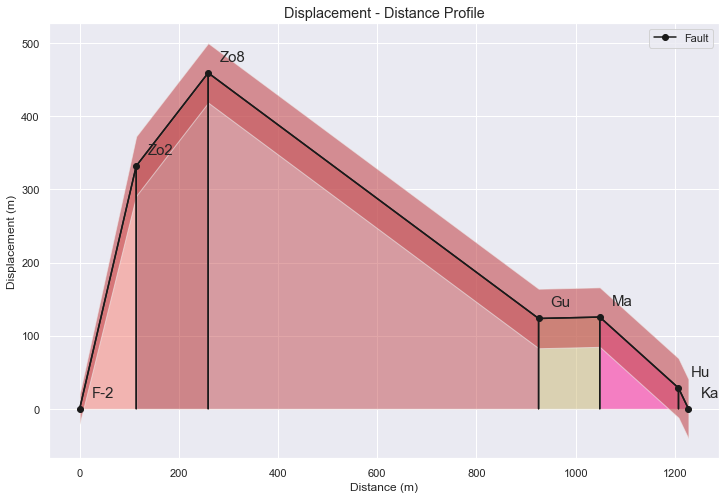

In [44]:
plot_disp_dist(x1, y1, x_litho_1, y_litho_1, color_1, label_1, error_1)

## Fault -2

In [45]:
x2 = list(disp_dist_df.loc[disp_dist_df['Name'] == 'f2']['Distance'])
y2 = list(disp_dist_df.loc[disp_dist_df['Name'] == 'f2']['Displacement'])
color_2 = disp_dist_df.loc[disp_dist_df['Name'] == 'f2']['Colour'].tolist()

In [46]:
error_2 = cal_error(disp_dist_df.loc[disp_dist_df['Name'] == 'f2']['Distance'], 
                    disp_dist_df.loc[disp_dist_df['Name'] == 'f2']['Displacement'], 
                    disp_dist_df.loc[disp_dist_df['Name'] == 'f2']['Uncertainty_num'])

In [47]:
label_2 = disp_dist_df.loc[disp_dist_df['Name'] == 'f2']['HorizonName'].tolist()

In [48]:
xy_fill_ls_2 = xy_fill_list(x2, y2)

In [49]:
x_name_ls_2 = xy_fill_ls_2[0]

In [50]:
y_name_ls_2 = xy_fill_ls_2[1]

In [51]:
x_litho_2 = litho_fill_x(x2, x_name_ls_2)

In [52]:
y_litho_2 = litho_fill_y(y2, y_name_ls_2)

In [53]:
y_litho_2

[(0.0, 55.0, 0.0),
 (0.0, 55.0, 51.0, 0.0),
 (0.0, 51.0, 52.8, 0.0),
 (0.0, 52.8, 6.3, 0.0),
 (0.0, 6.3, 0.8, 0.0),
 (0.0, 0.8, 0.0)]

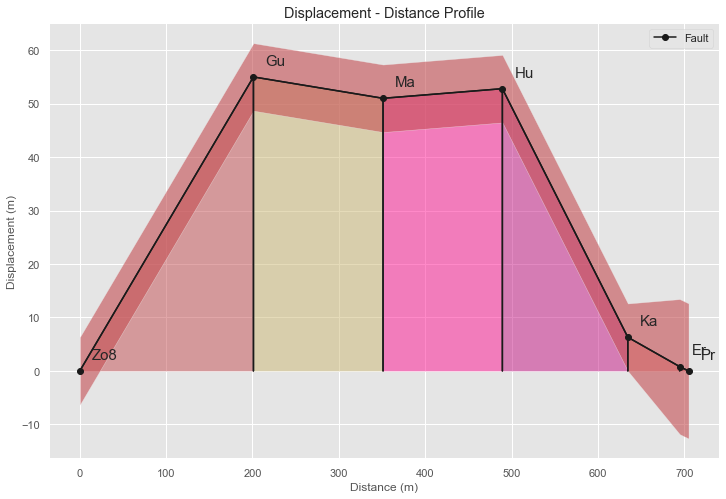

In [54]:
plot_disp_dist(x2, y2, x_litho_2, y_litho_2, color_2, label_2, error_2)

# Fault -12

In [55]:
x12 = list(disp_dist_df.loc[disp_dist_df['Name'] == 'f12']['Distance'])
y12 = list(disp_dist_df.loc[disp_dist_df['Name'] == 'f12']['Displacement'])
color_12 = disp_dist_df.loc[disp_dist_df['Name'] == 'f12']['Colour'].tolist()
label_12 = disp_dist_df.loc[disp_dist_df['Name'] == 'f12']['HorizonName'].tolist()

In [56]:
error_12 = cal_error(disp_dist_df.loc[disp_dist_df['Name'] == 'f12']['Distance'], 
                    disp_dist_df.loc[disp_dist_df['Name'] == 'f12']['Displacement'], 
                    disp_dist_df.loc[disp_dist_df['Name'] == 'f12']['Uncertainty_num'])

In [57]:
xy_fill_ls_12 = xy_fill_list(x12, y12)

In [58]:
x_name_ls_12 = xy_fill_ls_12[0]
y_name_ls_12 = xy_fill_ls_12[1]

In [59]:
x_name_ls_12

['a0', 'a1', 'a2', 'a3', 'a4', 'a5']

In [60]:
y_name_ls_12

['b0', 'b1', 'b2', 'b3', 'b4', 'b5']

In [61]:
x_litho_12 = litho_fill_x(x12, x_name_ls_12)
y_litho_12 = litho_fill_y(y12, y_name_ls_12)

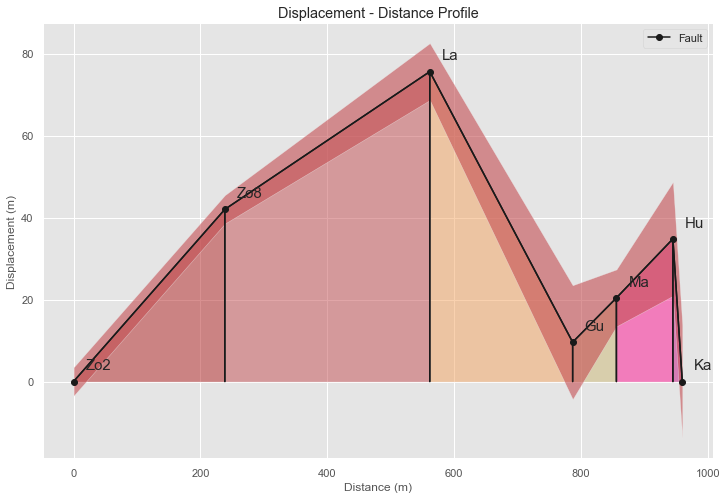

In [62]:
plot_disp_dist(x12, y12, x_litho_12, y_litho_12, color_12, label_12, error_12)

# Fault-5

In [63]:
x5 = list(disp_dist_df.loc[disp_dist_df['Name'] == 'f5']['Distance'])
y5 = list(disp_dist_df.loc[disp_dist_df['Name'] == 'f5']['Displacement'])
color_5 = disp_dist_df.loc[disp_dist_df['Name'] == 'f5']['Colour'].tolist()
label_5 = disp_dist_df.loc[disp_dist_df['Name'] == 'f5']['HorizonName'].tolist()

In [64]:
error_5 = cal_error(disp_dist_df.loc[disp_dist_df['Name'] == 'f5']['Distance'], 
                    disp_dist_df.loc[disp_dist_df['Name'] == 'f5']['Displacement'], 
                    disp_dist_df.loc[disp_dist_df['Name'] == 'f5']['Uncertainty_num'])

In [65]:
label_5 = disp_dist_df.loc[disp_dist_df['Name'] == 'f5']['HorizonName'].tolist()

In [66]:
xy_fill_ls_5 = xy_fill_list(x5, y5)

In [67]:
x5

[0.0, 148.6, 462.2, 640.4, 1265.2, 1438.3, 1570.7, 1768.0, 1982.8, 2002.0]

In [68]:
y5

[0.0, 94.0, 107.5, 94.5, 46.7, 48.4, 26.8, 49.2, 75.4, 0.0]

In [69]:
x_name_ls_5 = xy_fill_ls_5[0]

In [70]:
y_name_ls_5 = xy_fill_ls_5[1]

In [71]:
x_name_ls_5, y_name_ls_5

(['a0', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8'],
 ['b0', 'b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8'])

In [72]:
x_litho_5 = litho_fill_x(x5, x_name_ls_5)

In [73]:
x_litho_5

[(0.0, 148.6, 148.6),
 (148.6, 148.6, 462.2, 462.2),
 (462.2, 462.2, 640.4, 640.4),
 (640.4, 640.4, 1265.2, 1265.2),
 (1265.2, 1265.2, 1438.3, 1438.3),
 (1438.3, 1438.3, 1570.7, 1570.7),
 (1570.7, 1570.7, 1768.0, 1768.0),
 (1768.0, 1768.0, 1982.8, 1982.8),
 (1982.8, 1982.8, 2002.0)]

In [74]:
y_litho_5 = litho_fill_y(y5, y_name_ls_5)

In [75]:
y_litho_5

[(0.0, 94.0, 0.0),
 (0.0, 94.0, 107.5, 0.0),
 (0.0, 107.5, 94.5, 0.0),
 (0.0, 94.5, 46.7, 0.0),
 (0.0, 46.7, 48.4, 0.0),
 (0.0, 48.4, 26.8, 0.0),
 (0.0, 26.8, 49.2, 0.0),
 (0.0, 49.2, 75.4, 0.0),
 (0.0, 75.4, 0.0)]

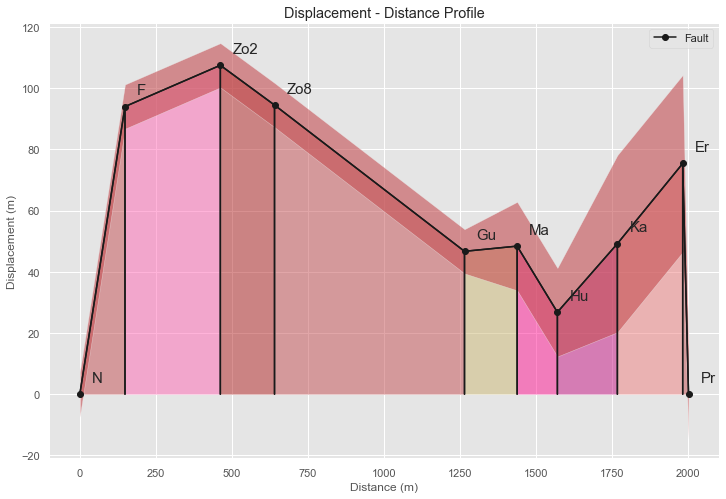

In [76]:
plot_disp_dist(x5, y5, x_litho_5, y_litho_5, color_5, label_5, error_5)

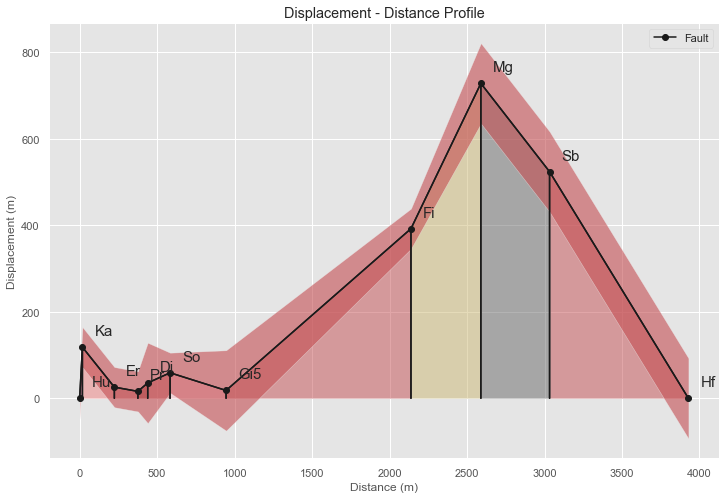

In [77]:
fault_plot(65)

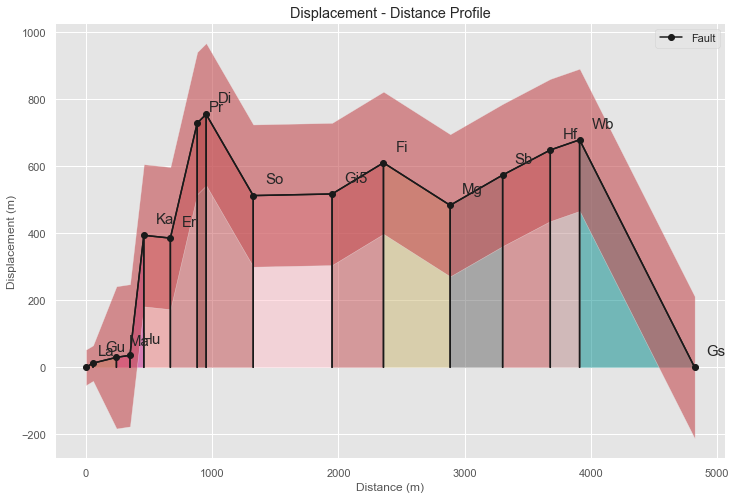

In [78]:
fault_plot(55)

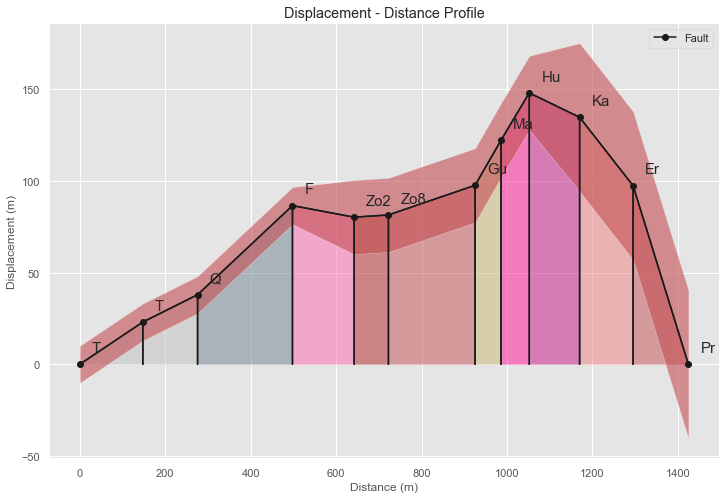

In [79]:
fault_plot(25)

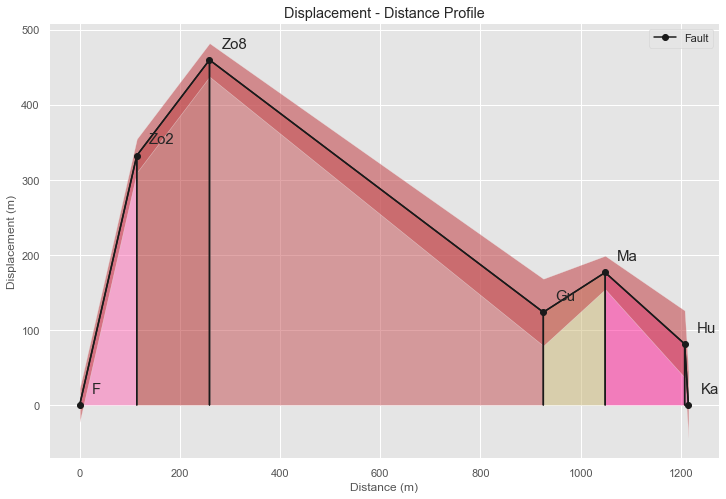

In [80]:
fault_plot(4)

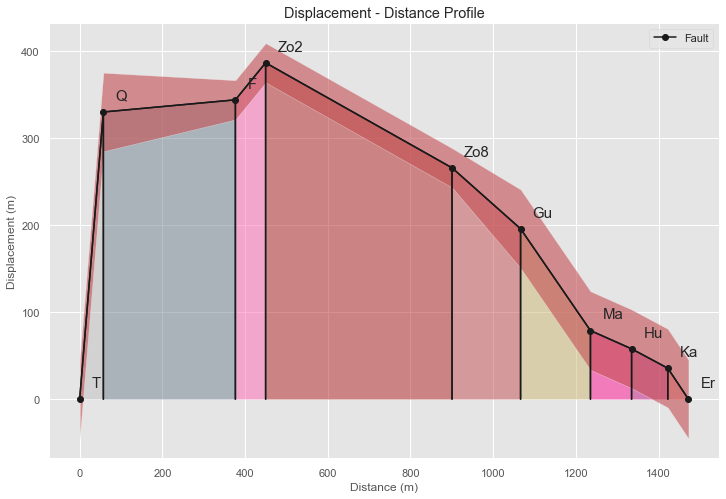

In [81]:
fault_plot(26)

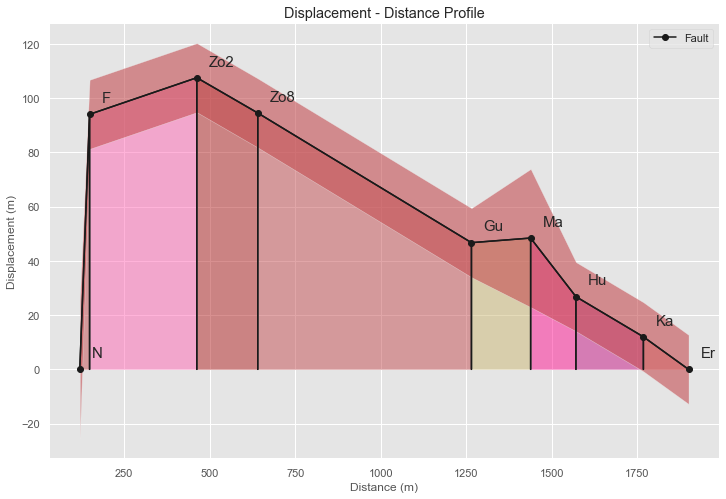

In [82]:
fault_plot(20)

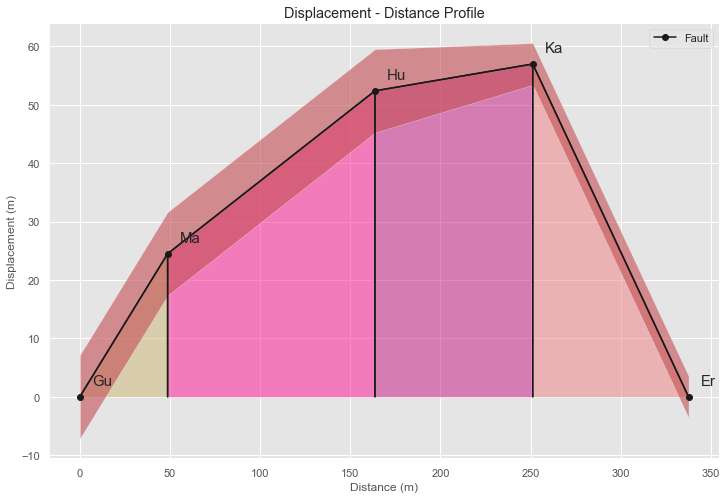

In [83]:
fault_plot(50)

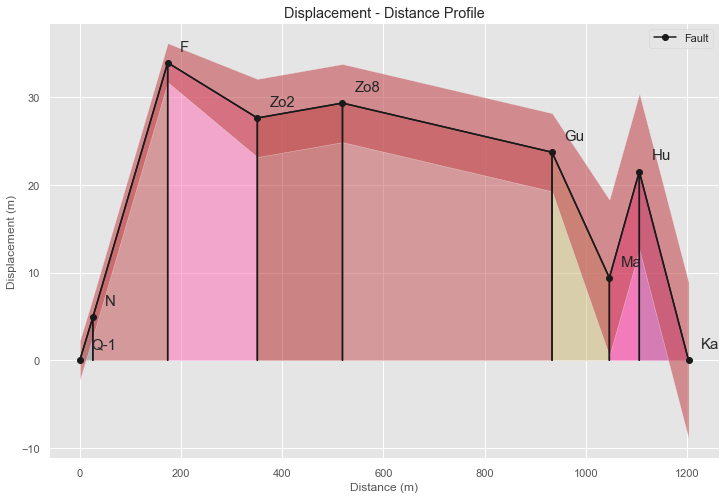

In [84]:
fault_plot(27)

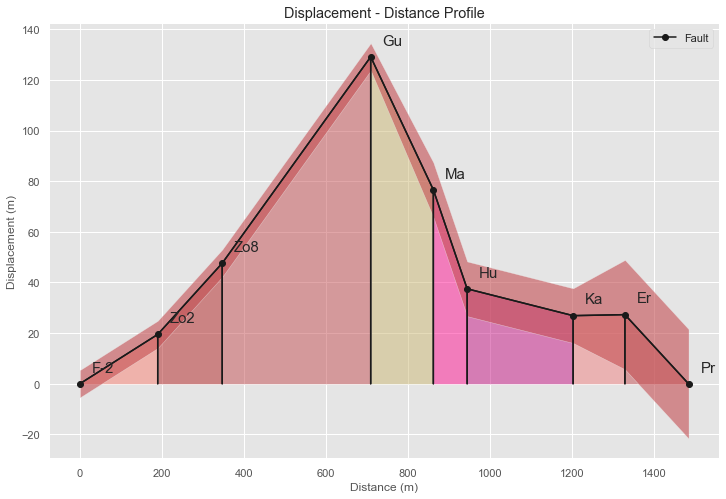

In [85]:
fault_plot(28)

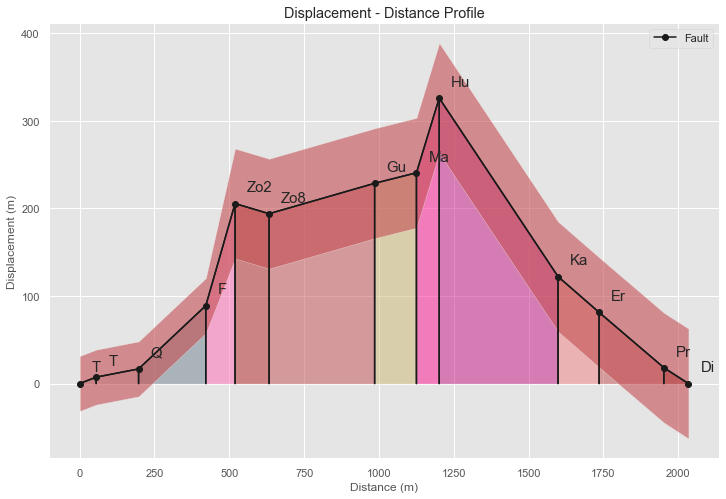

In [86]:
fault_plot(23)

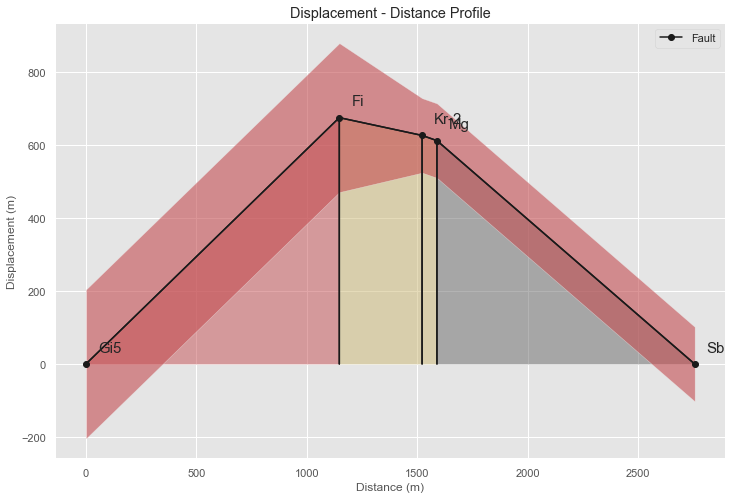

In [87]:
fault_plot(46)

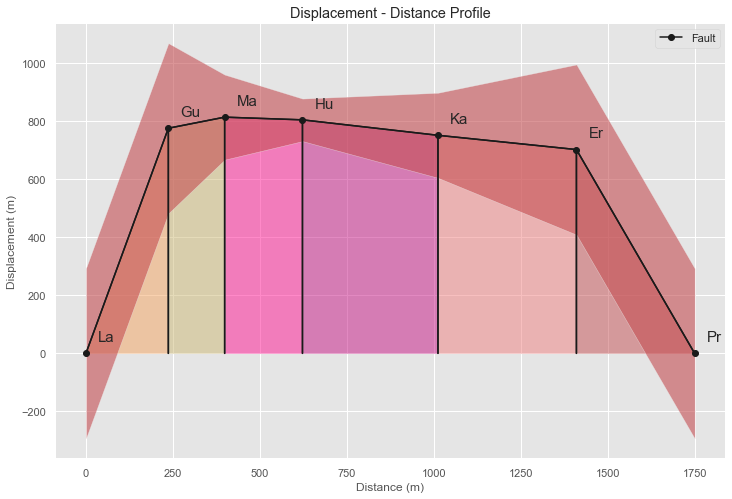

In [88]:
fault_plot(99)

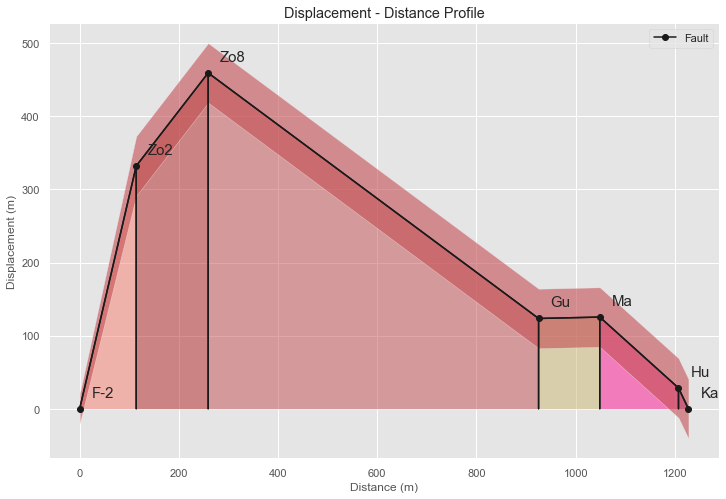

In [89]:
for i in range(1, 5):
    #fig = fault_plot(i)
    fault_plot(1)
    #fig.show()

# Smoother Plot

In [90]:
def plot_smooth_disp_dist(x, y, f, x_litho_fill_ls, y_litho_fill_ls, color_ls, labels, error_envelope):
    %matplotlib inline

    ax = plt.axes()
    ax.plot(x, y, '-ok', label='Fault')

    for i, type in enumerate(labels):
            ax.annotate(type, xy=(x[i], y[i]), xytext=(12,12), textcoords='offset points', size=(15))

    for i in range(len(x_litho_fill_ls)):
        ax.plot(x_litho_fill_ls[i], y_litho_fill_ls[i], '-k')

        
    for i in range(len(x_litho_fill_ls)):
        ax.fill_between(x_litho_fill_ls[i], y_litho_fill_ls[i], facecolor=(color_ls[i]), alpha=0.5)


    plt.fill_between(x, y-error_envelope, y+error_envelope, facecolor='r', alpha=0.6)


    leg = ax.legend()
    style.use('ggplot')
    
    ax.set(title = 'Displacement - Distance Profile',
       xlabel = 'Distance (m)',
       ylabel = 'Displacement (m)')
    
    x = np.linspace(min(x), max(x),1000)
    x_half = max(x) / 2

    y = (semicircular.pdf(x, x_half, x_half) * 10000000/f)

    plt.plot(x, y , color = 'red')

    fig_size = plt.gcf().get_size_inches() #Get current size
    sizefactor = 2 #Set a zoom factor#

    # Modify the current size by the factor
    return plt.gcf().set_size_inches(sizefactor * fig_size) 

In [91]:
f= 170

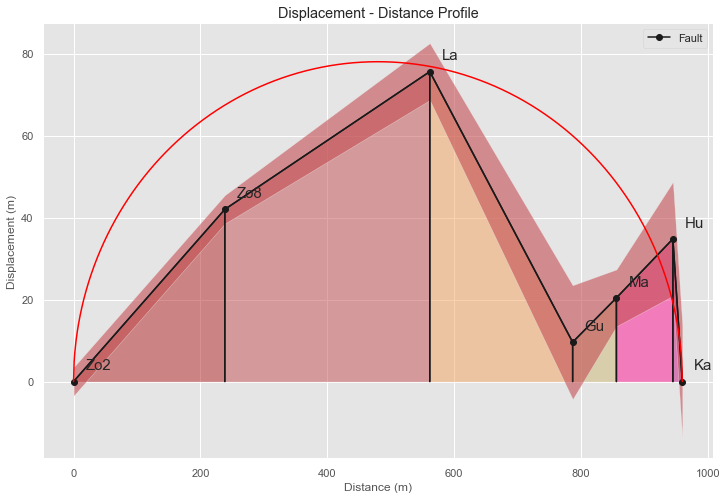

In [92]:
plot_smooth_disp_dist(x12, y12, f, x_litho_12, y_litho_12, color_12, label_12, error_12)

In [93]:
def smoother_plot(f, factor):
    # factor to set the curve on the data, larger give smaller curve
    fault_num = "f{0}".format(f)
    x = list(disp_dist_df.loc[disp_dist_df['Name'] == fault_num]['Distance'])
    y = list(disp_dist_df.loc[disp_dist_df['Name'] == fault_num]['Displacement'])
    color = disp_dist_df.loc[disp_dist_df['Name'] == fault_num]['Colour'].tolist()
    label = disp_dist_df.loc[disp_dist_df['Name'] == fault_num]['HorizonName'].tolist()
    error = cal_error(disp_dist_df.loc[disp_dist_df['Name'] == fault_num]['Distance'], 
                        disp_dist_df.loc[disp_dist_df['Name'] == fault_num]['Displacement'], 
                        disp_dist_df.loc[disp_dist_df['Name'] == fault_num]['Uncertainty_num'])

    xy_fill_ls = xy_fill_list(x, y)
    x_name_ls = xy_fill_ls[0]
    y_name_ls = xy_fill_ls[1]

    x_litho = litho_fill_x(x, x_name_ls)
    y_litho = litho_fill_y(y, y_name_ls)

    return plot_smooth_disp_dist(x, y,factor, x_litho, y_litho, color, label, error)

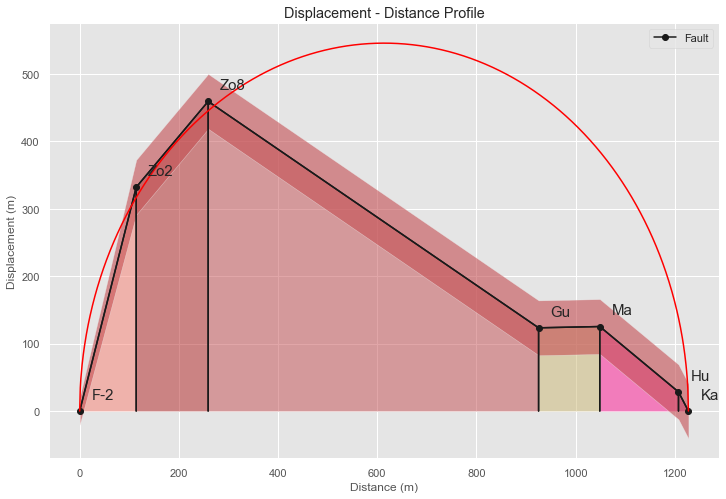

In [94]:
# use fault number and factor 'f'
smoother_plot(1, 19)

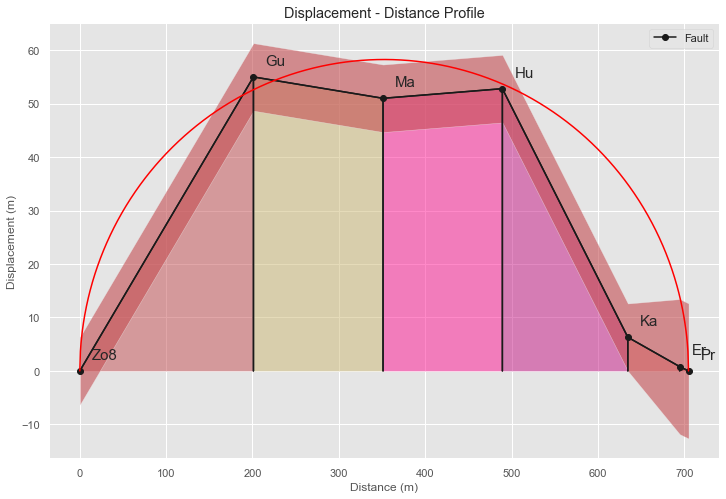

In [95]:
# use fault number and factor 'f'
smoother_plot(2, 310)

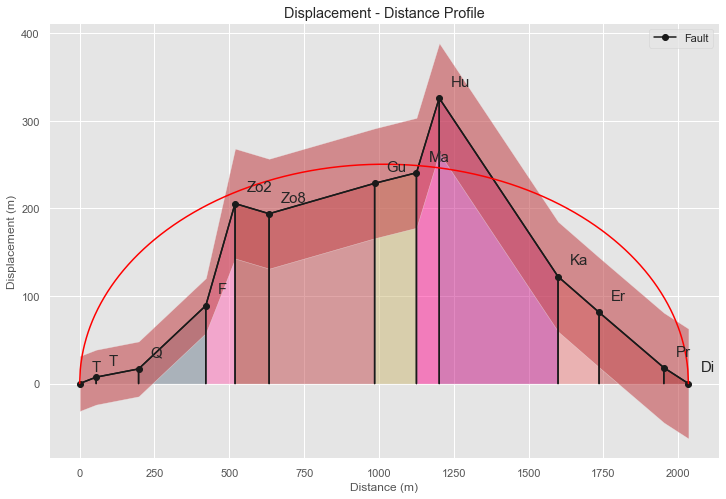

In [96]:
# use fault number and factor 'f'
smoother_plot(23, 25)

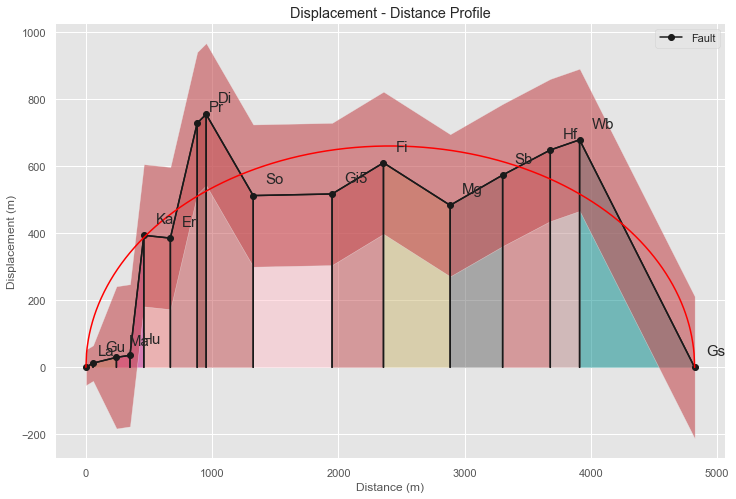

In [97]:
# use fault number and factor 'f'
smoother_plot(55, 4)

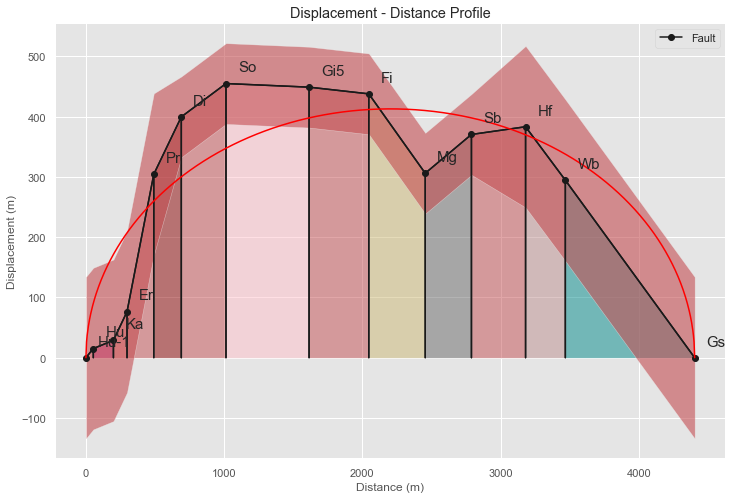

In [98]:
# use fault number and factor 'f'
smoother_plot(57, 7)

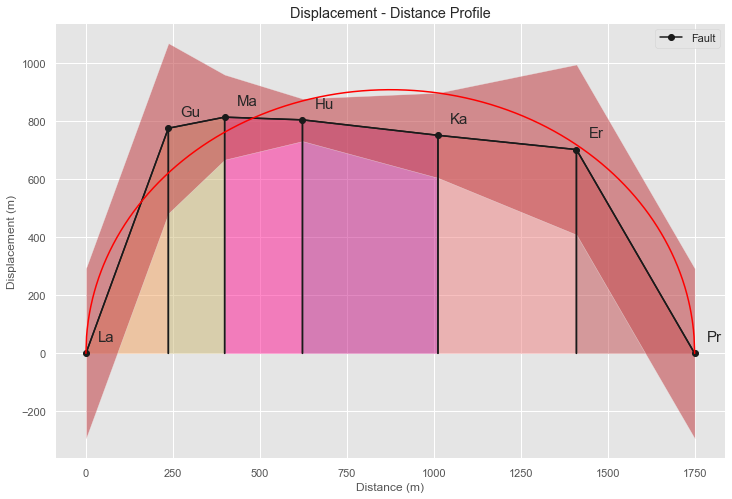

In [99]:
# use fault number and factor 'f'
smoother_plot(99, 8)

#####  Thank you
##### By: Ramy Abdallah